In [1]:
# This document can generate the eigenvectors |e_i> from randomly sampled arguments.
# It was primarily used for testing distributions of theta21 in an attempt to get |e1> to be distributed like |e0>.
# I no longer expect that to be the case, but I did spend a fair amount of time here.

import numpy as np
import matplotlib.pyplot as plt
from generate_states import make_cs, make_s_mat, Params, make_rho_prime_mat

In [2]:
def nth_root(x, n):
    return np.sign(x) * np.abs(x)**(1/n)

In [6]:
def sample_params(samps):
    unif = np.random.uniform
    
    _theta = np.arccos(unif(-1, 1, samps))
    _psi = unif(0, 2 * np.pi, samps)
    _theta_prime = np.arccos(unif(-1, 1, samps))
    _psi_prime = unif(0, 2 * np.pi, samps)
    _r = np.cbrt(unif(0, 1, samps))
    _zeta = unif(0, 2 * np.pi, samps)

    # what follows is purely a guess
    mu = np.random.dirichlet(np.ones(4), samps)  # sample mu's uniformly from the random simplex
    #_theta32 = np.arccos(1-unif(0, 1, samps)**(0.58333333333))  # sample thetas and psis as for pure states
        # tried sampling as arccos(1 - different roots of u), couldn't get right shape. got close with power ~ 5/8
    _theta32 = np.arccos(np.cbrt(unif(0,1,samps)))
        # looking at form of e1, theta32 should be chosen just like eta (where r=cos^2 eta)?
            # side note: r = cos(eta) is a better way of looking at it!
    _psi32 = unif(0, 2 * np.pi, samps)
    # _theta21 = np.arcsin(unif(0, 1, samps)**(3))
    # _theta21 = np.arccos(unif(0, 1, samps)**(1/32)) # higher powers give better results.....
    #_theta21 = np.arcsin(unif(-1,1,samps)**9)
        #
    # u_theta21 = np.random.uniform(0,1,samps)
    # _theta21 = []
    # for u in u_theta21:
        # root = np.sqrt([x for x in np.roots([9, -15, -5, 15, 0, 4 * u**2 - 4])
        #         if np.abs(np.imag(x)) < 1e-5 and x >= 0 and x <= 1])
            # from cos(x) sin^2(2x)
        # root = [x for x in np.roots([60, 0, -84, 0, 35, 0, 0, 11 * u - 11]) 
        #         if np.abs(np.imag(x)) < 1e-5 and x >= 0 and x <= 1]
            # from cos(x) cos^2(2x) sin(2x)
        # root = [x for x in np.roots([12, 0, -10, 0, 0, np.sqrt(2) * u + 2 * u - 2])
        #         if np.abs(np.imag(x)) < 1e-5 and x >= 0 and x <= 1] 
            # from cos(x) sin(4x) -- the best so far!!
        # root = np.sqrt([x for x in np.roots([7200, -20160, 18312, -5880, 1400, -840, 0, 121 * u**2 - 32]) 
        #                   if np.abs(np.imag(x)) < 1e-5 and x >= 0 and x <= 1])
            # from cos(x) sin(2x) sin(4x)
        # root = np.sqrt([x for x in np.roots([1225, -4725, 6210, -2730, 189, -945, 840, 0, 0,
        #                                      64 * (u**2 - 1)]) if np.abs(np.imag(x)) < 1e-5
        #                                                             and x >= 0 and x <= 1])
            # from cos^5(x)sin^4(x)
        # root = np.sqrt([x for x in np.roots([6, -15, 10, 0, 0, u - 1]) if np.abs(np.imag(x)) < 1e-5
        #                     and x >= 0 and x <= 1])
            # from cos^5(x)sin^3(x)
        # print(np.arccos(root[0]) / np.pi)
        # _theta21.append(np.arccos(root[-1]))
    # _theta21 = np.array(_theta21)
    # print(_theta21.shape)
    _theta21 = np.arccos(unif(-1, 1, samps))
    _psi21 = unif(0, 2*np.pi, samps)
    _theta0 = np.arccos(unif(-1, 1, samps))
    _psi0 = unif(0, 2 * np.pi, samps)

    return Params(mu0=mu[:, 0], mu1=mu[:, 1], mu2=mu[:, 2], r=_r, zeta=_zeta, theta=_theta, psi=_psi,
                  theta_prime=_theta_prime, psi_prime=_psi_prime, theta32=_theta32, psi32=_psi32, theta21=_theta21,
                  psi21=_psi21, theta0=_theta0, psi0=_psi0, )

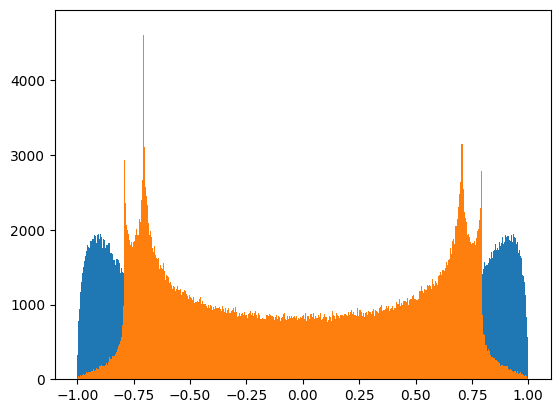

In [518]:
u = np.random.uniform(0,1,1000000)
v = u**3 * (60*u**4-84*u**2+35) / 11
theta_test = np.arccos(v)
#min(np.arccos(v)) / np.pi, max(np.arccos(v)) / np.pi
c_test, s_test = make_cs(theta_test, np.random.uniform(0,2*np.pi,1000000))
#plt.hist(np.real(s_test), bins=1000);
plt.hist(np.real(c32),bins=1000);
plt.hist(np.real(c_test), bins=1000);

In [7]:
params = sample_params(100000)
# params = Params(
#     mu0=np.array([0.5,0.5], dtype="complex256"),
#     mu1=np.array([0.25,0.25], dtype="complex256"),
#     mu2=np.array([.2,0.25], dtype="complex256"),
#     r=np.array([0.25,.75], dtype="complex256"),
#     zeta=np.array([np.pi, 3*np.pi/2], dtype="complex256"),
#     theta=np.array([np.pi / 5, np.pi/2], dtype="complex256"),
#     psi=np.array([np.pi / 3, 11*np.pi/6], dtype="complex256"),
#     theta_prime=np.array([np.pi / 3, 7*np.pi/8], dtype="complex256"),
#     psi_prime=np.array([np.pi / 2, 13*np.pi/24], dtype="complex256"),
#     theta0=np.array([3 * np.pi / 2, 7*np.pi/6], dtype="complex256"),
#     psi0=np.array([np.pi / 2, 0], dtype="complex256"),
#     theta21=np.array([np.pi / 2, np.pi/3], dtype="complex256"),
#     psi21=np.array([0, 5*np.pi/4], dtype="complex256"),
#     theta32=np.array([np.pi / 2, np.pi/7], dtype="complex256"),
#     psi32=np.array([3 * np.pi / 2, np.pi], dtype="complex256"),)

q_plus = np.sqrt((1 + params.r) / 2)
q_minus = np.sqrt((1 - params.r) / 2)
zeta = params.zeta
mu0 = params.mu0
mu1 = params.mu1
mu2 = params.mu2
mu3 = params.mu3

s_mat = make_s_mat(params.theta, params.psi, params.theta_prime, params.psi_prime)

c32, s32 = make_cs(params.theta32, params.psi32)
c21, s21 = make_cs(params.theta21, params.psi21)
#r_prime = 3 * np.log(np.random.uniform(np.e / 3, 1, 1000000))
#phi_prime = np.random.uniform(0, 2*np.pi, 1000000)
# c21 = ((1 + r_prime) / 2)**(1/2) * np.exp(-1j/2 * phi_prime)
# s21 = ((1 - r_prime) / 2)**(1/2) * np.exp(1j/2 * phi_prime)
c0, s0 = make_cs(params.theta0, params.psi0)

In [440]:
rho_prime = make_rho_prime_mat(sample_params(1000000))

In [441]:
e0_prime = np.matmul(rho_prime, np.array([1,0,0,0]))
e0_prime

array([[ 0.29436416+9.97465999e-18j,  0.10990406+8.43997682e-02j,
         0.03380616+2.91026407e-02j,  0.02418847+3.41109513e-02j],
       [ 0.1163282 +4.33680869e-18j,  0.10273676-5.66441920e-02j,
         0.04218823+6.88598369e-02j,  0.01497312+4.29218598e-02j],
       [ 0.24302862+0.00000000e+00j, -0.1552676 +7.49394463e-03j,
         0.0128492 +1.28463597e-03j,  0.19534951-6.18678483e-02j],
       ...,
       [ 0.23115494-5.20417043e-18j,  0.00948472-1.87648202e-02j,
         0.02596062+4.61498795e-03j, -0.04442857+2.54194039e-02j],
       [ 0.14479606+3.46944695e-18j,  0.08393994+4.42018853e-02j,
        -0.03296136-4.61157796e-02j,  0.02465667+4.84178383e-02j],
       [ 0.34593595+5.20417043e-18j,  0.09158446-1.27090963e-02j,
         0.09303878+2.03407459e-02j,  0.06642697+3.34896000e-02j]])

In [8]:
def re_shape(x, n):
    if len(x.shape) == 1:
        return x.reshape(x.size, *([1]*n))
    else:
        raise TypeError

In [9]:
q_plus = re_shape(q_plus,1)
q_minus = re_shape(q_minus,1)
zeta = re_shape(zeta,1)
c32 = re_shape(c32,1)
s32 = re_shape(s32,1)
c21 = re_shape(c21,1)
s21 = re_shape(s21,1)
c0 = re_shape(c0,1)
s0 = re_shape(s0,1)
mu0 = re_shape(mu0,2)
mu1 = re_shape(mu1,2)
mu2 = re_shape(mu2,2)
mu3 = re_shape(mu3,2)

In [10]:
phi0 = np.matmul(s_mat, np.array([1, 0, 0, 0]))  # phi * phi'
phi1 = np.matmul(s_mat, np.array([0, 1, 0, 0]))  # phi_perp * phi'_perp
phi2 = np.matmul(s_mat, np.array([0, 0, 1, 0]))  # phi * phi'_perp
phi3 = np.matmul(s_mat, np.array([0, 0, 0, 1]))  # phi_perp * phi'

In [445]:
s_mat - np.transpose(np.array([phi0, phi1, phi2, phi3]), (1,2,0))

array([[[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

       ...,

       [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.

In [11]:
e0 = q_plus * phi0 + np.exp(1j * zeta) * q_minus * phi1
e0_perp = -np.exp(-1j * zeta) * q_minus * phi0 + q_plus * phi1
e1 = c21 * e0_perp + s21 * (c32 * phi2 + s32 * phi3)
#e1 = c32 * phi2 + s32 * phi3
e2 = -c0 * np.conj(s21) * e0_perp + (
        c0 * np.conj(c21) * c32 - s0 * np.conj(s32)) * phi2 + (
        c0 * np.conj(c21) * s32 + s0 * np.conj(c32)) * phi3
e3 = np.conj(s0) * np.conj(s21) * e0_perp - (
        np.conj(s0) * np.conj(c21) * c32 + np.conj(c0) * np.conj(s32)) * phi2 - (
        np.conj(s0) * np.conj(c21) * s32 - np.conj(c0) * np.conj(c32)) * phi3

In [ ]:
def proj_op(v):
    return np.apply_along_axis(lambda x: np.outer(x,np.conj(x)), 1, v)

In [ ]:
rho_prime = mu0 * proj_op(e0) + mu1 * proj_op(e1) + mu2 * proj_op(e2) + mu3 * proj_op(e3)

In [ ]:
rho_prime - np.array([[[ 0.31527774+2.54109884e-21j,  0.01216335-9.18240721e-02j,
          0.02423271-7.52546547e-02j,  0.03021712+2.28857079e-02j],
        [ 0.01216335+9.18240721e-02j,  0.26396039-6.35274710e-21j,
          0.04198577+4.85660284e-02j, -0.05128625+1.08831119e-01j],
        [ 0.02423271+7.52546547e-02j,  0.04198577-4.85660284e-02j,
          0.27443885+1.27054942e-21j, -0.00552253+9.85164780e-02j],
        [ 0.03021712-2.28857079e-02j, -0.05128625-1.08831119e-01j,
         -0.00552253-9.85164780e-02j,  0.14632302-1.27054942e-21j]], 

        [[ 0.23730269+2.54109884e-21j, -0.03113797-4.17596996e-02j,
         -0.07501871-7.11876747e-03j, -0.0376405 -5.29239301e-02j],
        [-0.03113797+4.17596996e-02j,  0.32409731+9.31736242e-21j,
          0.05490746+1.05341589e-01j,  0.07215979+8.28041517e-02j],
        [-0.07501871+7.11876747e-03j,  0.05490746-1.05341589e-01j,
          0.09518626-8.47032947e-22j,  0.01822409-6.48878484e-02j],
        [-0.0376405 +5.29239301e-02j,  0.07215979-8.28041517e-02j,
          0.01822409+6.48878484e-02j,  0.34341374-1.35525272e-20j]]])

In [ ]:
def concurrence(a0, a1, a2, a3, p1, p2, p3):
    return 2 * np.abs(a0 * a3 * np.exp(1j * p3) - a1 * np.exp(1j * p1) * a2 * np.exp(1j * p2))

def concurrence_from_vec(x, n):
    a0 = np.abs(x[:, 0])
    a1 = np.abs(x[:, 1])
    a2 = np.abs(x[:, 2])
    a3 = np.abs(x[:, 3])
    p0 = np.angle(x[:, 0])
    p1 = np.angle(x[:, 1]) - p0
    p2 = np.angle(x[:, 2]) - p0
    p3 = np.angle(x[:, 3]) - p0
    return concurrence(a0, a1, a2, a3, p1, p2, p3)

(0.5593886500790576,
 0.9963194594674178,
 0.8463724689132084,
 0.07094171570854176,
 0.0036805405325818206,
 0.4406113499209423,
 0.1536275310867915,
 0.07094171570854176)

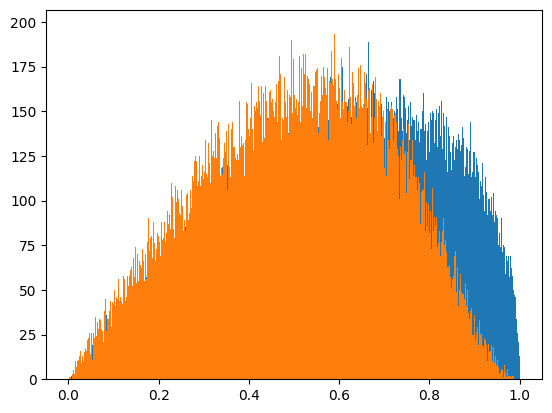

In [639]:
# coeffs = np.sqrt(np.random.dirichlet(np.ones(4),1000000))
# phases = np.random.uniform(0, 2*np.pi, (1000000, 3))
# plt.hist(concurrence(coeffs[:,0],coeffs[:,1],coeffs[:,2],coeffs[:,3], phases[:,0],phases[:,1],phases[:,2]), bins=1000);

plt.hist(concurrence_from_vec(e0),bins=1000);
plt.hist(concurrence_from_vec(e1),bins=1000);
(np.min(np.abs(c21)**2), np.max(np.abs(c21)**2), np.mean(np.abs(c21)**2),
 np.std(np.abs(c21)**2), np.min(np.abs(s21)**2), np.max(np.abs(s21)**2),
 np.mean(np.abs(s21)**2), np.std(np.abs(s21)**2))
#print(c21[1:20])
#plt.hist(concurrence_from_vec(e2),bins=1000);

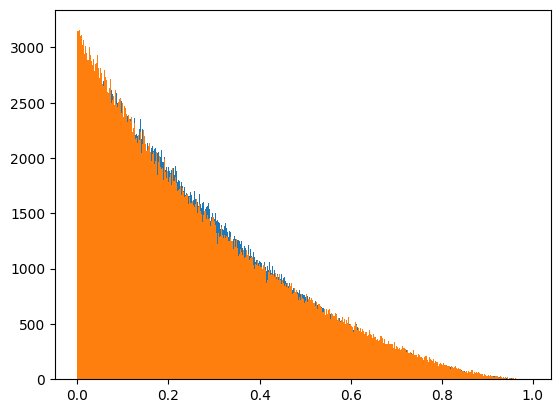

In [587]:
# plt.hist((np.angle(e1[:, 1]) - np.angle(e1[:, 0])) % (2 * np.pi), bins=1000);

plt.hist(np.random.dirichlet(np.ones(4), 1000000)[:,0], bins=1000);
plt.hist(np.abs(e1[:,2])**2, bins=1000);

In [ ]:
plt.hist(np.abs(e1[:,2])**2, bins=1000);
plt.hist(np.random.dirichlet(np.ones(4), 1000000)[:,0], bins=1000);

In [ ]:
u = np.random.uniform(0,1,1000000)
z = (2j * np.sqrt(u - u**2) + 2*u - 1)**(1/3)
z += 1 / z
xi = np.arccos(z)
xi
dummy = np.real_if_close(np.cos(xi), 1e-15)
plt.hist(1 / 4 * dummy**3 - 3 / 4 * dummy + 1 / 2, bins=1000);

array([0.001795  , 0.00279299, 0.00379098, ..., 0.99778857, 0.99878656,
       0.99978455])

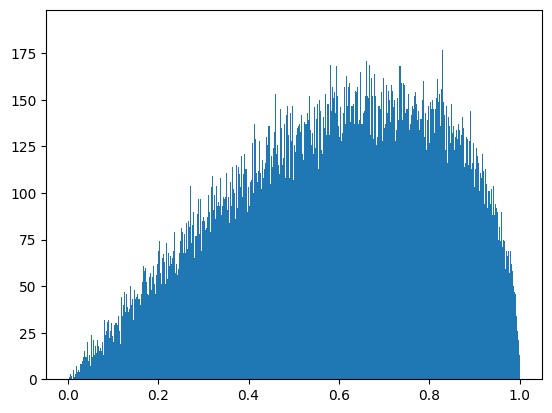

In [644]:
test_data_x, test_data_y, _ = plt.hist(concurrence_from_vec(e0),bins=1000)
test_data_x
test_data_y 